In [97]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
# to encode label unique values into integer
from sklearn.preprocessing import LabelEncoder

In [98]:
#importing the dataset

In [99]:
data = pd.read_csv('/content/Bullying_2018.csv',sep = ";")
data.head(131)

,record,Bullied_on_school_property_in_past_12_months,Bullied_not_on_school_property_in_past_12_months,Cyber_bullied_in_past_12_months,Custom_Age,Sex,Physically_attacked,Physical_fighting,Felt_lonely,Close_friends,Miss_school_no_permission,Other_students_kind_and_helpful,Parents_understand_problems,Most_of_the_time_or_always_felt_lonely,Missed_classes_or_school_without_permission,Were_underweight,Were_overweight,Were_obese
0,1,Yes,Yes,,13 years old,Female,0 times,0 times,Always,2,10 or more days,Never,Always,Yes,Yes,,,
1,2,No,No,No,13 years old,Female,0 times,0 times,Never,3 or more,0 days,Sometimes,Always,No,No,,,
2,3,No,No,No,14 years old,Male,0 times,0 times,Never,3 or more,0 days,Sometimes,Always,No,No,No,No,No
3,4,No,No,No,16 years old,Male,0 times,2 or 3 times,Never,3 or more,0 days,Sometimes,,No,No,No,No,No
4,5,No,No,No,13 years old,Female,0 times,0 times,Rarely,3 or more,0 days,Most of the time,Most of the time,No,No,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126,127,No,No,No,13 years old,Male,0 times,0 times,Most of the time,0,0 days,Sometimes,Rarely,Yes,No,,,
127,128,No,No,No,13 years old,Female,4 or 5 times,4 or 5 times,Rarely,3 or more,0 days,Sometimes,Sometimes,No,No,,,
128,129,Yes,Yes,Yes,14 years old,Female,10 or 11 times,1 time,Always,3 or more,0 days,Sometimes,Most of the time,Yes,No,No,No,No
129,130,No,No,No,13 years old,Male,0 times,4 or 5 times,Never,3 or more,1 or 2 days,Rarely,Sometimes,No,Yes,No,Yes,No


In [100]:
data.isnull().sum()

record                                              0
Bullied_on_school_property_in_past_12_months        0
Bullied_not_on_school_property_in_past_12_months    0
Cyber_bullied_in_past_12_months                     0
Custom_Age                                          0
Sex                                                 0
Physically_attacked                                 0
Physical_fighting                                   0
Felt_lonely                                         0
Close_friends                                       0
Miss_school_no_permission                           0
Other_students_kind_and_helpful                     0
Parents_understand_problems                         0
Most_of_the_time_or_always_felt_lonely              0
Missed_classes_or_school_without_permission         0
Were_underweight                                    0
Were_overweight                                     0
Were_obese                                          0
dtype: int64

In [101]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56981 entries, 0 to 56980
Data columns (total 18 columns):
 #   Column                                            Non-Null Count  Dtype 
---  ------                                            --------------  ----- 
 0   record                                            56981 non-null  int64 
 1   Bullied_on_school_property_in_past_12_months      56981 non-null  object
 2   Bullied_not_on_school_property_in_past_12_months  56981 non-null  object
 3   Cyber_bullied_in_past_12_months                   56981 non-null  object
 4   Custom_Age                                        56981 non-null  object
 5   Sex                                               56981 non-null  object
 6   Physically_attacked                               56981 non-null  object
 7   Physical_fighting                                 56981 non-null  object
 8   Felt_lonely                                       56981 non-null  object
 9   Close_friends               

In [102]:
data.describe()

,record
count,56981.000000
mean,28535.389832
std,16479.971553
min,1.000000
25%,14263.000000
50%,28522.000000
75%,42804.000000
max,57095.000000


In [103]:
data.replace(r'^\s*$', np.nan, regex=True, inplace=True)

In [104]:
data = data.dropna()

In [105]:
data.isna().sum()

record                                              0
Bullied_on_school_property_in_past_12_months        0
Bullied_not_on_school_property_in_past_12_months    0
Cyber_bullied_in_past_12_months                     0
Custom_Age                                          0
Sex                                                 0
Physically_attacked                                 0
Physical_fighting                                   0
Felt_lonely                                         0
Close_friends                                       0
Miss_school_no_permission                           0
Other_students_kind_and_helpful                     0
Parents_understand_problems                         0
Most_of_the_time_or_always_felt_lonely              0
Missed_classes_or_school_without_permission         0
Were_underweight                                    0
Were_overweight                                     0
Were_obese                                          0
dtype: int64

In [106]:
#encoding the values of text to numerical data

In [107]:
le=LabelEncoder()
data['Bullied_on_school_property_in_past_12_months']= le.fit_transform(data['Bullied_on_school_property_in_past_12_months'])
data['Bullied_not_on_school_property_in_past_12_months']= le.fit_transform(data['Bullied_not_on_school_property_in_past_12_months'])
data['Cyber_bullied_in_past_12_months']= le.fit_transform(data['Cyber_bullied_in_past_12_months'])
data['Custom_Age']= le.fit_transform(data['Custom_Age'])
data['Sex']= le.fit_transform(data['Sex'])
data['Physically_attacked']= le.fit_transform(data['Physically_attacked'])
data['Physical_fighting']= le.fit_transform(data['Physical_fighting'])
data['Felt_lonely']= le.fit_transform(data['Felt_lonely'])
data['Close_friends']= le.fit_transform(data['Close_friends'])
data['Miss_school_no_permission']= le.fit_transform(data['Miss_school_no_permission'])
data['Parents_understand_problems']= le.fit_transform(data['Parents_understand_problems'])
data['Other_students_kind_and_helpful']= le.fit_transform(data['Other_students_kind_and_helpful'])
data['Most_of_the_time_or_always_felt_lonely']= le.fit_transform(data['Most_of_the_time_or_always_felt_lonely'])
data['Missed_classes_or_school_without_permission']= le.fit_transform(data['Missed_classes_or_school_without_permission'])

In [108]:
# declaration for making three prediction models 

In [109]:
X = data.values[:,4:14]
Y2 = data.Bullied_not_on_school_property_in_past_12_months
Y1 = data.Bullied_on_school_property_in_past_12_months
Y3 = data.Cyber_bullied_in_past_12_months

In [110]:
data.head()

,record,Bullied_on_school_property_in_past_12_months,Bullied_not_on_school_property_in_past_12_months,Cyber_bullied_in_past_12_months,Custom_Age,Sex,Physically_attacked,Physical_fighting,Felt_lonely,Close_friends,Miss_school_no_permission,Other_students_kind_and_helpful,Parents_understand_problems,Most_of_the_time_or_always_felt_lonely,Missed_classes_or_school_without_permission,Were_underweight,Were_overweight,Were_obese
2,3,0,0,0,3,1,0,0,2,3,0,4,0,0,0,No,No,No
5,6,0,0,0,2,1,0,1,2,3,0,1,0,0,0,No,No,No
10,11,0,0,0,4,1,0,1,2,3,3,1,0,0,1,No,No,No
22,23,0,0,1,2,1,0,4,1,3,0,3,0,1,0,No,No,No
23,24,0,0,0,3,1,0,4,1,2,0,0,4,1,0,No,Yes,Yes


In [111]:
c = data.corr()


<Axes: >

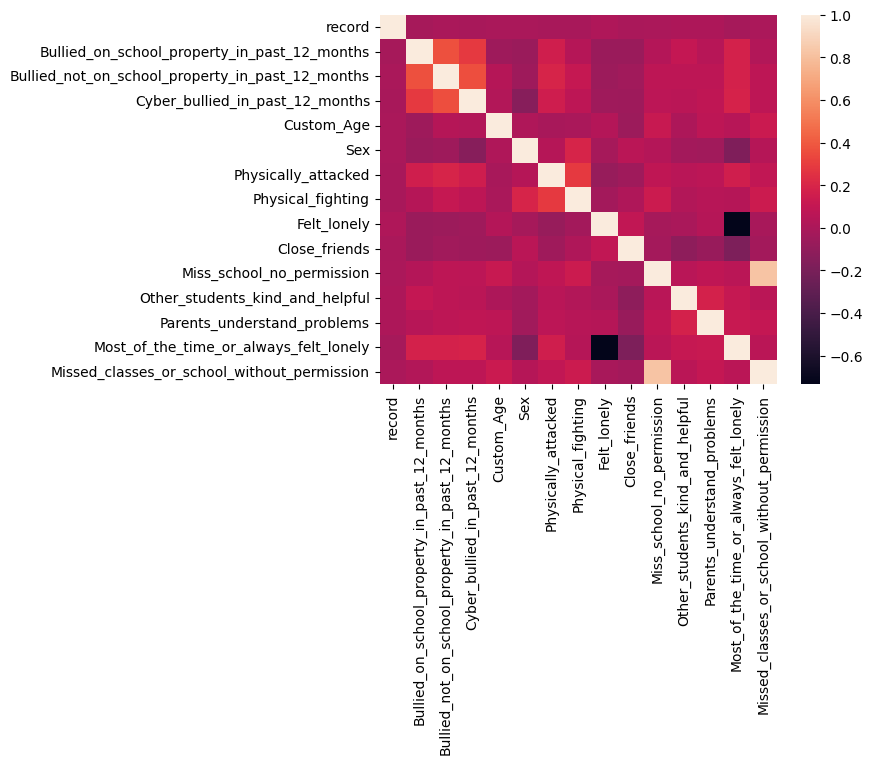

In [112]:
sns.heatmap(c)

In [113]:
#splitting all three w.r.t X/Y1, X/Y2 and X/Y3

In [114]:
X_train,X_test,Y1_train,Y1_test = train_test_split(X,Y1,test_size = 0.4,random_state = 76)
X_train,X_test,Y2_train,Y2_test = train_test_split(X,Y2,test_size = 0.4,random_state = 76)
X_train,X_test,Y3_train,Y3_test = train_test_split(X,Y3,test_size = 0.4,random_state = 76)

In [115]:
model1 = DecisionTreeClassifier()
model1.fit(X_train,Y1_train)

DecisionTreeClassifier()

In [116]:
Y1_train_prediction = model1.predict(X_train)
Acc_Y1_train = accuracy_score(Y1_train_prediction,Y1_train)
print('Bullied_on_school_property_in_past_12_months prediction train Accuracy :',Acc_Y1_train*100)

Bullied_on_school_property_in_past_12_months prediction train Accuracy : 90.89667037749216


In [117]:
Y1_test_prediction = model1.predict(X_test)
Acc_Y1_test = accuracy_score(Y1_test_prediction,Y1_test)
print('Bullied_on_school_property_in_past_12_months Prediction test Accuracy: ',Acc_Y1_test*100)

Bullied_on_school_property_in_past_12_months Prediction test Accuracy:  74.36247723132969


In [118]:
print(Y1_test_prediction)

[0 1 0 ... 0 1 1]


In [119]:
model2 = DecisionTreeClassifier()
model2.fit(X_train,Y2_train)

DecisionTreeClassifier()

In [120]:
Y2_train_prediction = model2.predict(X_train)
Acc_Y2_train = accuracy_score(Y2_train_prediction,Y2_train)
print('Bullied_not_on_school_property_in_past_12_months prediction train Accuracy :',Acc_Y2_train*100)

Bullied_not_on_school_property_in_past_12_months prediction train Accuracy : 90.71450258071046


In [121]:
Y2_test_prediction = model2.predict(X_test)
Acc_Y2_test = accuracy_score(Y2_test_prediction,Y2_test)
print('Bullied_not_on_school_property_in_past_12_months Prediction test Accuracy: ',Acc_Y2_test*100)

Bullied_not_on_school_property_in_past_12_months Prediction test Accuracy:  72.89010321797207


In [122]:
model3 = DecisionTreeClassifier()

In [123]:
model3.fit(X_train,Y3_train)

DecisionTreeClassifier()

In [124]:
Y3_train

17721    1
40459    0
31566    0
23702    0
45164    1
        ..
24038    1
45620    0
39089    1
16939    1
21700    0
Name: Cyber_bullied_in_past_12_months, Length: 19762, dtype: int64

In [125]:
print(Y1_train.shape)

(19762,)


In [126]:
print(Y1_train)

17721    1
40459    1
31566    0
23702    0
45164    0
        ..
24038    0
45620    0
39089    0
16939    0
21700    0
Name: Bullied_on_school_property_in_past_12_months, Length: 19762, dtype: int64


In [127]:
Y3_train.info()

<class 'pandas.core.series.Series'>
Int64Index: 19762 entries, 17721 to 21700
Series name: Cyber_bullied_in_past_12_months
Non-Null Count  Dtype
--------------  -----
19762 non-null  int64
dtypes: int64(1)
memory usage: 308.8 KB


In [128]:
Y3_train_prediction = model3.predict(X_train)
Acc_Y3_train = accuracy_score(Y3_train_prediction,Y3_train)
print('Cyber_bullied_in_past_12_months prediction train Accuracy :',Acc_Y3_train*100)

Cyber_bullied_in_past_12_months prediction train Accuracy : 90.17305940694261


In [129]:
Y3_test_prediction = model3.predict(X_test)
Acc_Y3_test = accuracy_score(Y3_test_prediction,Y3_test)
print('Cyber_bullied_in_past_12_months Prediction test Accuracy: ',Acc_Y3_test*100)

Cyber_bullied_in_past_12_months Prediction test Accuracy:  73.01153612629022


In [130]:
model3.predict([[0,0,0,0,2,2,2,0,1,1]])

array([0])

In [131]:
tr=pd.DataFrame(Y1_test_prediction)

In [132]:
print(Y1_test)

35845    0
39763    0
50290    0
20053    0
52714    1
        ..
40840    0
32503    0
21802    0
30010    0
53574    0
Name: Bullied_on_school_property_in_past_12_months, Length: 13176, dtype: int64


In [133]:
u=pd.DataFrame(Y1_test)
u.shape
print(u)

       Bullied_on_school_property_in_past_12_months
35845                                             0
39763                                             0
50290                                             0
20053                                             0
52714                                             1
...                                             ...
40840                                             0
32503                                             0
21802                                             0
30010                                             0
53574                                             0

[13176 rows x 1 columns]


In [134]:
# number of childeren bullied on school according to data
k = u[u['Bullied_on_school_property_in_past_12_months']==1]
print(k.shape[0])

2772


In [135]:
# number of childeren not bullied on school according to data
l = u[u['Bullied_on_school_property_in_past_12_months']==0]
print(l.shape[0])

10404


In [138]:
v= (pd.DataFrame(Y1_test_prediction))
v.rename(columns={0:'Bullied_on_school_property_in_past_12_months'},inplace=True)

In [141]:
# number of bullied on school trained model prediction
m = v[v['Bullied_on_school_property_in_past_12_months']==1]
print(m.shape[0])

1882


In [147]:
# number of not bullied on school trained model prediction
n = v[v['Bullied_on_school_property_in_past_12_months']==0]
print(n.shape[0])

11294


In [142]:
#importing pickle to save the model

In [143]:
import pickle
name1 = 'Bully_on_school.sav'
pickle.dump(model1,open(name1,'wb'))

In [144]:
name2 = 'Bully_not_on_school.sav'
pickle.dump(model2,open(name2,'wb'))

In [145]:
name3 = 'Cyber_Bully.sav'
pickle.dump(model3,open(name3,'wb'))

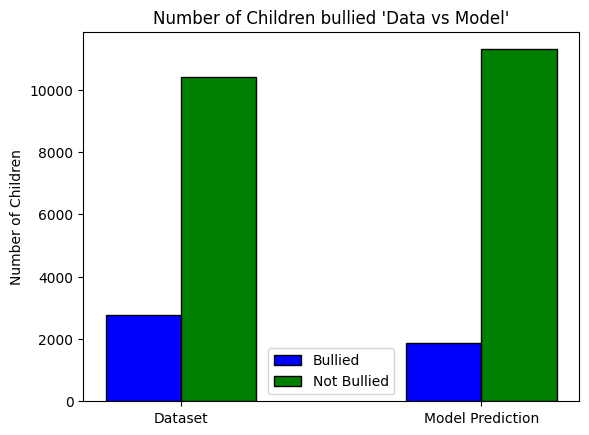

In [153]:
Graph = ['bullied on school']
bullied = [2772,1882]
not_bullied = [10404,11294]
  
n=2
r = np.arange(n)
width = 0.25
  
  
plt.bar(r, bullied, color = 'b',
        width = width, edgecolor = 'black',
        label='Bullied')
plt.bar(r + width, not_bullied, color = 'g',
        width = width, edgecolor = 'black',
        label='Not Bullied')
  

plt.ylabel("Number of Children")
plt.title("Number of Children bullied 'Data vs Model'")
  
# plt.grid(linestyle='--')
plt.xticks(r + width/2,['Dataset','Model Prediction'])
plt.legend()
  
plt.show()